# Analisi dei Dati di Rete con Grafi

Dal punto di vista della scienza dei dati, una rete è semplicemente una collezione di oggetti interconnessi. In pratica, possiamo trattare tutti i tipèi di oggetti numerici e non numerici (testuali) come se fossero reti, sempre che esista un qualsiasi modo per interconneterli.

Matematicamente parlando, un grafo è un insieme di nodi connessi da spigoli. Vi sono vari tipi di spigoli, di nodi e grafi, connessi e interpretati in modi differenti.

In [1]:
%pip install networkx matplotlib pandas

  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
Using cached networkx-3.4.2-py3-none-any.whl (1.7 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:

import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import networkx.algorithms.community as nx_comm
    

## **Elementi, Tipi e Densità dei Grafi con Python**
In questo notebook analizzeremo gli elementi base dei grafi, i loro diversi tipi e come calcolarne la densità utilizzando **NetworkX**.

### **1. Elementi di un Grafo**
Un grafo è composto da:
- **Nodi (Vertices)**: rappresentano gli oggetti o entità.
- **Archi (Edges)**: rappresentano le connessioni tra i nodi.
- **Pesi (Weights)** *(opzionale)*: rappresentano il valore dell'arco.

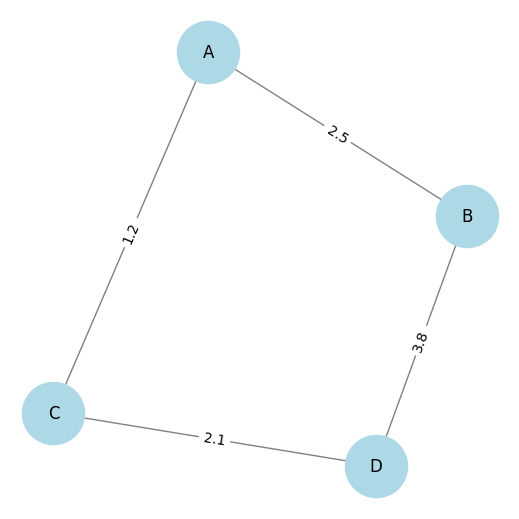

In [11]:

# Creazione di un grafo con pesi
G = nx.Graph()

# Aggiunta di nodi e archi con pesi
G.add_weighted_edges_from([("A", "B", 2.5), ("A", "C", 1.2), ("B", "D", 3.8), ("C", "D", 2.1)])

# Disegno del grafo
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'weight')

plt.figure(figsize=(5, 5))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=12)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()
    

### **2. Tipi di Grafi**

#### **Grafo Non Orientato**
Un **grafo non orientato** è composto da **nodi (vertici)** e **archi (spigoli)**. Gli archi non hanno una direzione specifica, quindi la connessione tra due nodi è **bidirezionale**.

**Formalmente**, un grafo non orientato è definito come:
\[ G = (V, E) \]
dove:
- \( V \) è l'insieme dei nodi.
- \( E \) è l'insieme degli archi, rappresentati come coppie \( (u, v) \).

Se \( (u, v) \in E \), allora anche \( (v, u) \in E \).

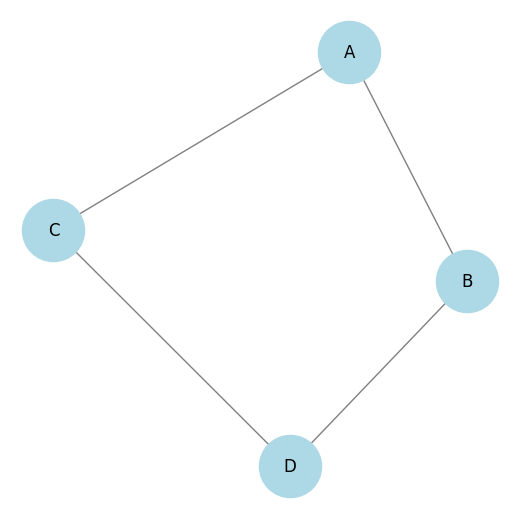

In [18]:

# Creazione di un grafo non orientato
G = nx.Graph()

# Aggiunta di nodi
G.add_nodes_from(["A", "B", "C", "D"])

# Aggiunta di archi
G.add_edges_from([("A", "B"), ("A", "C"), ("B", "D"), ("C", "D")])

# Disegno del grafo
plt.figure(figsize=(5, 5))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=12)
plt.show()

##### **Proprietà di un Grafo Non Orientato**
- **Simmetria degli archi**: $ (u, v) \in E \Rightarrow (v, u) \in E $
- **Assenza di direzione**: Gli archi possono essere percorsi in entrambi i versi.
- **Numero massimo di archi**: Per un grafo con \( N \) nodi, il numero massimo di archi è: $ D = \frac{2E}{N(N-1)} $

#### **Grafo Orientato**
Un **grafo orientato** è un insieme di nodi collegati da archi direzionati. **Formalmente**, un grafo orientato è definito come: $ G = (V, E) $
dove:
- $V$ è l'insieme dei nodi.
- $E$ è l'insieme degli archi direzionati $(u, v)$, che indicano una connessione da $u$ a $v$.

##### **Creazione di un Grafo Orientato in Python**

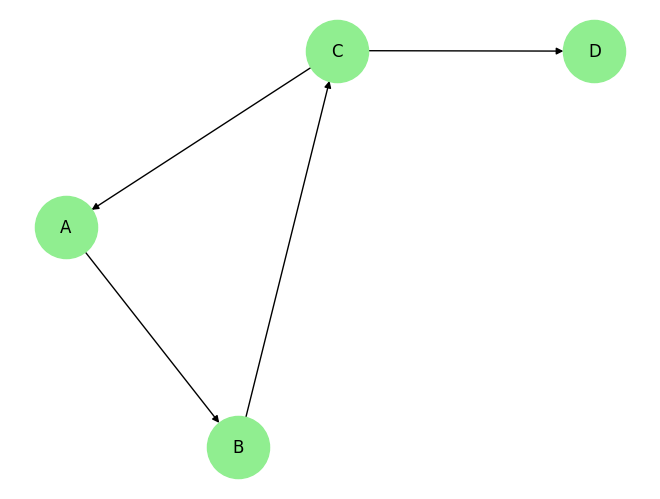

In [27]:

DG = nx.DiGraph()
DG.add_edges_from([("A", "B"), ("B", "C"), ("C", "A"), ("C", "D")])
nx.draw(DG, with_labels=True, node_color='lightgreen', edge_color='black', node_size=2000, arrows=True)
plt.show()
    

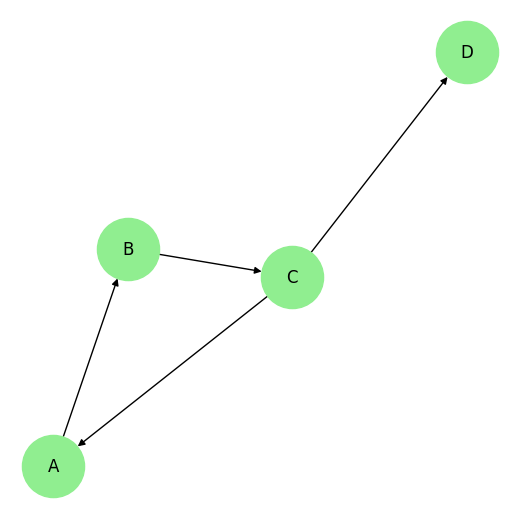

In [28]:

# Creazione di un grafo orientato
DG = nx.DiGraph()

# Aggiunta di nodi e archi direzionati
DG.add_edges_from([("A", "B"), ("B", "C"), ("C", "A"), ("C", "D")])

# Disegno del grafo
plt.figure(figsize=(5, 5))
nx.draw(DG, with_labels=True, node_color='lightgreen', edge_color='black', node_size=2000, font_size=12, arrows=True)
plt.show()
    

##### **Proprietà di un Grafo Orientato**
##### **Grado Entrante e Grado Uscente**

In [29]:

in_degrees = dict(DG.in_degree())
out_degrees = dict(DG.out_degree())

print("Grado entrante dei nodi:", in_degrees)
print("Grado uscente dei nodi:", out_degrees)
    

Grado entrante dei nodi: {'A': 1, 'B': 1, 'C': 1, 'D': 1}
Grado uscente dei nodi: {'A': 1, 'B': 1, 'C': 2, 'D': 0}


##### **Percorso più breve in un Digraph**

In [24]:

shortest_path = nx.shortest_path(DG, source="A", target="D")
print("Percorso più breve da A a D:", shortest_path)
    

Percorso più breve da A a D: ['A', 'B', 'C', 'D']


##### **Cicli in un Grafo Orientato**

In [25]:

has_cycle = nx.simple_cycles(DG)
cycles = list(has_cycle)
print("Cicli presenti nel grafo:", cycles)
    

Cicli presenti nel grafo: [['C', 'A', 'B']]


### **2.3. Grafo Pesato**

Grafo Pesato: Definizione e Implementazione in Python
Un grafo pesato è un grafo in cui ogni arco ha un valore associato, chiamato peso. Il peso di un arco può rappresentare:

- Distanze tra città
- Costi di trasporto
- Forza delle connessioni sociali
- Probabilità di transizione tra stati in un modello di Markov
- E molto altro.

Un grafo pesato è definito come $G=(V,E,W)$ Dove:

- V è l'insieme dei nodi (vertici).
- E è l'insieme degli archi.
- $W:E→R$ è una funzione che assegna un peso numerico ad ogni arco.

Se il grafo è orientato, gli archi hanno una direzione. Se è non orientato, gli archi sono bidirezionali.

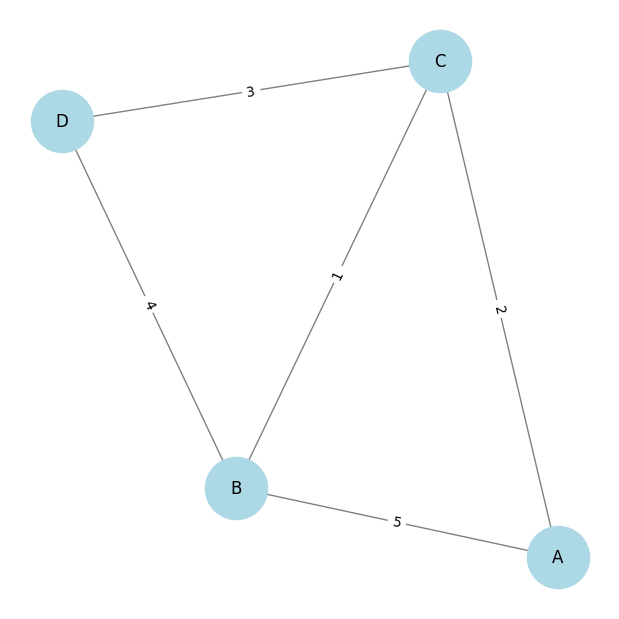

Percorso più breve da A a D: ['A', 'C', 'D']
Distanza minima: 5


In [ ]:

import networkx as nx
import matplotlib.pyplot as plt

# Creazione del grafo pesato
G = nx.Graph()

# Aggiunta di nodi
G.add_nodes_from(["A", "B", "C", "D"])

# Aggiunta di archi con pesi
G.add_weighted_edges_from([
    ("A", "B", 5),
    ("A", "C", 2),
    ("B", "D", 4),
    ("C", "D", 3),
    ("B", "C", 1)
])

# Disegno del grafo con etichette di peso
pos = nx.spring_layout(G)  # Disposizione dei nodi
labels = nx.get_edge_attributes(G, 'weight')  # Etichette dei pesi

plt.figure(figsize=(6, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=12)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

# L'algoritmo di Dijkstra trova il percorso più breve tra due nodi in un grafo pesato.
shortest_path = nx.shortest_path(G, source="A", target="D", weight="weight")
shortest_distance = nx.shortest_path_length(G, source="A", target="D", weight="weight")

print(f"Percorso più breve da A a D: {shortest_path}")
print(f"Distanza minima: {shortest_distance}")
    

#### Albero Ricoprente Minimo (Minimum Spanning Tree - MST)
L’MST è un sotto-grafo che connette tutti i nodi con il peso totale minimo, utile per:

- Ottimizzazione delle reti di comunicazione
- Progettazione di infrastrutture stradali
- Reti elettriche efficienti

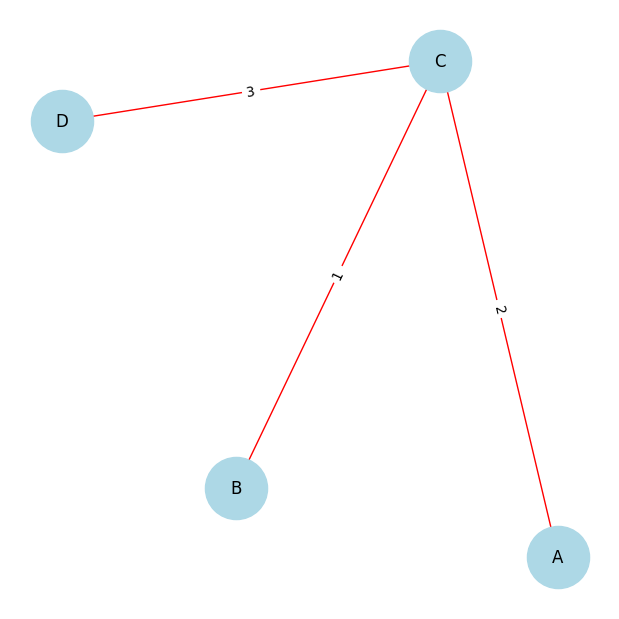

In [33]:
mst = nx.minimum_spanning_tree(G, weight="weight")

# Disegno dell'albero ricoprente minimo
plt.figure(figsize=(6, 6))
nx.draw(mst, pos, with_labels=True, node_color='lightblue', edge_color='red', node_size=2000, font_size=12)
nx.draw_networkx_edge_labels(mst, pos, edge_labels=nx.get_edge_attributes(mst, 'weight'))
plt.show()


#### Centralità dei Nodi Basata sul Peso
Possiamo calcolare l'importanza dei nodi nel grafo usando il concetto di centralità di betweenness pesata:

In [34]:
betweenness = nx.betweenness_centrality(G, weight="weight")
print("Centralità di betweenness (pesata):", betweenness)


Centralità di betweenness (pesata): {'A': 0.0, 'B': 0.0, 'C': 0.8333333333333333, 'D': 0.0}


#### Applicazioni Reali dei Grafi Pesati
I grafi pesati sono utilizzati in diversi ambiti:

- Reti di trasporto 🚆:
    - I nodi rappresentano città.
    - I pesi rappresentano le distanze o i tempi di percorrenza.

- Reti di comunicazione 📡:
    - I nodi rappresentano router o server.
    - I pesi rappresentano il tempo di latenza o il costo della trasmissione.

- Flussi di rete e logistica 🚛:
    - I pesi rappresentano il costo del trasporto tra due punti.

- Analisi di reti sociali 📊:
    - I pesi rappresentano la forza delle connessioni tra utenti.

#### **2.4. Grafo Completo**
Un grafo completo è un grafo in cui ogni coppia di nodi è direttamente connessa da un arco. È anche noto come $Kₙ$, dove n rappresenta il numero di nodi.

Un grafo completo è un grafo $G=(V,E)$ in cui:

- $V$ è l'insieme dei nodi.
- $E$ è l'insieme degli archi che collegano ogni coppia di nodi.
- Il numero totale di archi in un grafo completo con n nodi è dato da: $E= 2n(n−1)$ per i grafi non orientati, 

mentre per i grafi orientati: $E=n(n−1)$

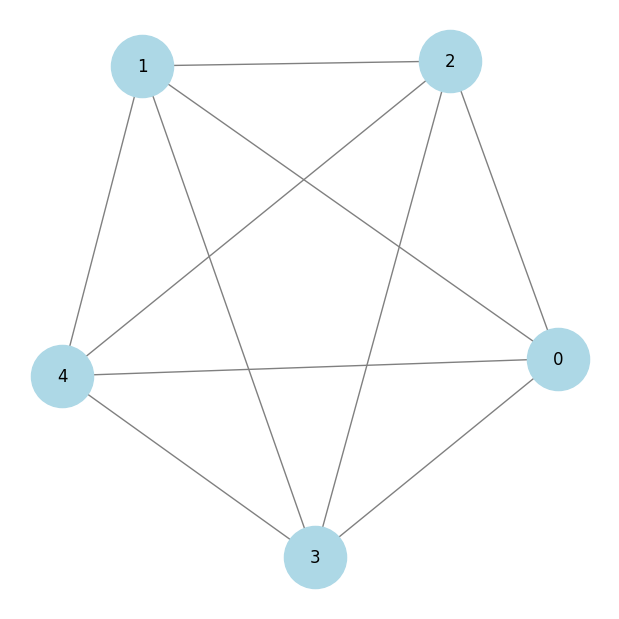

Numero di nodi: 5
Numero di archi: 10
Grado di ciascun nodo: {0: 4, 1: 4, 2: 4, 3: 4, 4: 4}
Percorso più breve tra 0 e 3: [0, 3]


In [39]:
import networkx as nx
import matplotlib.pyplot as plt

# Creazione di un grafo completo con 5 nodi
n = 5
G = nx.complete_graph(n)

# Disegno del grafo
plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=12)
plt.show()

print(f"Numero di nodi: {G.number_of_nodes()}")
print(f"Numero di archi: {G.number_of_edges()}")

degrees = dict(G.degree())
print("Grado di ciascun nodo:", degrees)

shortest_path = nx.shortest_path(G, source=0, target=3)
print(f"Percorso più breve tra 0 e 3: {shortest_path}")

    

##### Applicazioni dei Grafi Completi
I grafi completi sono utilizzati in diversi contesti:

- Reti di comunicazione ottimali 📡
- Problemi di ottimizzazione come il Problema del Commesso Viaggiatore (TSP) 🚛
- Simulazioni di reti sociali completamente connesse 🕸️
- Algoritmi di clustering e machine learning 🤖

#### **2.5. Grafo Bipartito**
Un **grafo bipartito** è un grafo i cui nodi possono essere divisi in due insiemi disgiunti **U** e **V**, in modo tale che ogni arco connetta solo nodi appartenenti a insiemi diversi.

**Esempio grafico:**
```
 U = {1, 2, 3}       V = {A, B, C}
        1 ---- A
        2 ---- B
        3 ---- C
```

Ogni nodo di **U** è collegato solo a nodi di **V**, ma mai a un altro nodo di **U**.
Creiamo un grafo bipartito con due insiemi di nodi **U = {1, 2, 3}** e **V = {A, B, C}** e aggiungiamo archi solo tra nodi appartenenti a insiemi diversi.

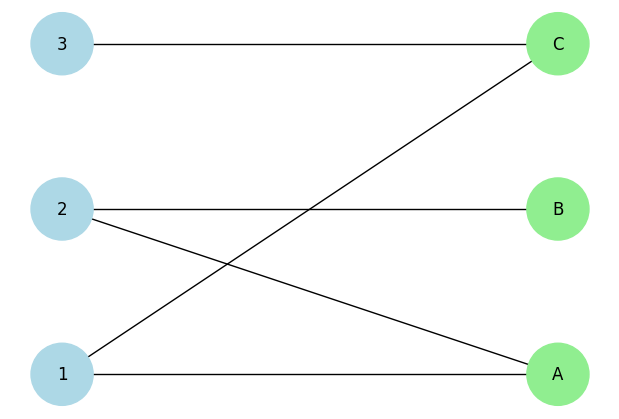

Il grafo è bipartito? True


In [ ]:

# Creazione di un grafo bipartito
B = nx.Graph()

# Definizione degli insiemi U e V
U = ["1", "2", "3"]
V = ["A", "B", "C"]

# Aggiunta dei nodi con attributo 'bipartite'
B.add_nodes_from(U, bipartite=0)  # Primo insieme
B.add_nodes_from(V, bipartite=1)  # Secondo insieme

# Aggiunta degli archi
B.add_edges_from([("1", "A"), ("2", "B"), ("3", "C"), ("1", "C"), ("2", "A")])

# Posizionamento dei nodi
pos = {}
pos.update((node, (1, index)) for index, node in enumerate(U))  # Livello superiore
pos.update((node, (2, index)) for index, node in enumerate(V))  # Livello inferiore

# Disegno del grafo
plt.figure(figsize=(6, 4))
nx.draw(B, pos, with_labels=True, node_color=["lightblue"]*len(U) + ["lightgreen"]*len(V), edge_color='black', node_size=2000, font_size=12)
plt.show()

# Verifica se il grafo è bipartito
is_bipartite = nx.is_bipartite(B)
print(f"Il grafo è bipartito? {is_bipartite}")
    

##### Creazione di un Grafo Bipartito Completo K_{3,3}
Un **grafo bipartito completo** collega **ogni nodo di U con tutti i nodi di V**.

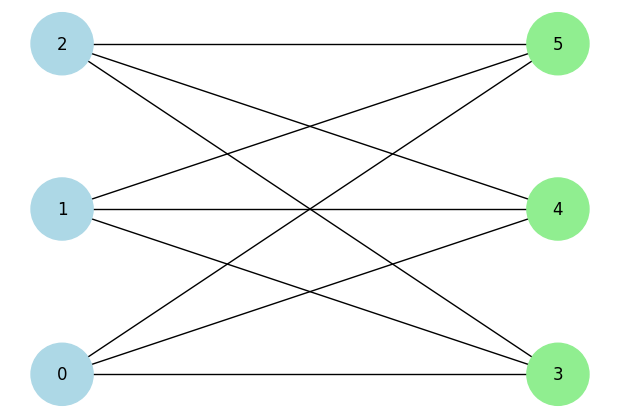

Il grafo è bipartito? True


In [ ]:

# Creazione di un grafo bipartito completo K_{3,3}
B_complete = nx.complete_bipartite_graph(3, 3)

# Posizionamento automatico per bipartizione
pos = nx.bipartite_layout(B_complete, nodes=range(3))

# Disegno del grafo
plt.figure(figsize=(6, 4))
nx.draw(B_complete, pos, with_labels=True, node_color=['lightblue']*3 + ['lightgreen']*3, edge_color='black', node_size=2000, font_size=12)
plt.show()

# Verifica se il grafo è bipartito
is_bipartite = nx.is_bipartite(B)
print(f"Il grafo è bipartito? {is_bipartite}")
    

#### Applicazioni dei Grafi Bipartiti

- Matching nei Mercati 🔄
- Assegnazione di studenti a dormitori
- Assegnazione di lavoratori a progetti
- Raccomandazioni in Machine Learning 📊
- Consigli di film (grafi utente-film)
- Sistemi di raccomandazione (es. Netflix, Spotify)
- Bioinformatica e Chimica 🧬
- Modellazione di interazioni proteina-proteina
- Studi sulle connessioni tra geni e malattie

## Importare Dati da un CSV

Creiamo un file CSV con dati per un grafo e lo importiamo.

In [9]:

# Creazione di un DataFrame simulato e salvataggio in CSV
df = pd.DataFrame({"source": ["A", "A", "B", "C"], "target": ["B", "C", "D", "D"]})
df.to_csv("edges.csv", index=False)
print(df)
    

  source target
0      A      B
1      A      C
2      B      D
3      C      D


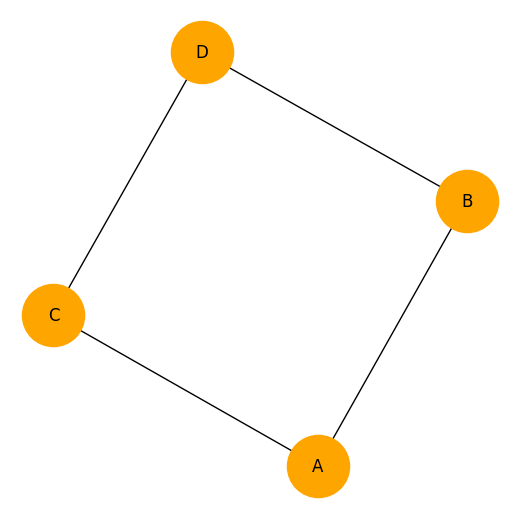

In [10]:

# Lettura del CSV e creazione del grafo
df = pd.read_csv("edges.csv")
G_csv = nx.from_pandas_edgelist(df, source="source", target="target")

# Disegno del grafo
plt.figure(figsize=(5, 5))
nx.draw(G_csv, with_labels=True, node_color='orange', edge_color='black', node_size=2000, font_size=12)
plt.show()
    

## Conclusione
Abbiamo esplorato diverse operazioni sui grafi con **NetworkX**, compresa la creazione, l'analisi e la visualizzazione. Questi strumenti possono essere applicati a molteplici scenari reali.